In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

### Data Handling

In [2]:
data = pd.read_csv(r"C:\Users\Zehra\Desktop\ML\data\cars_price.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


<Axes: >

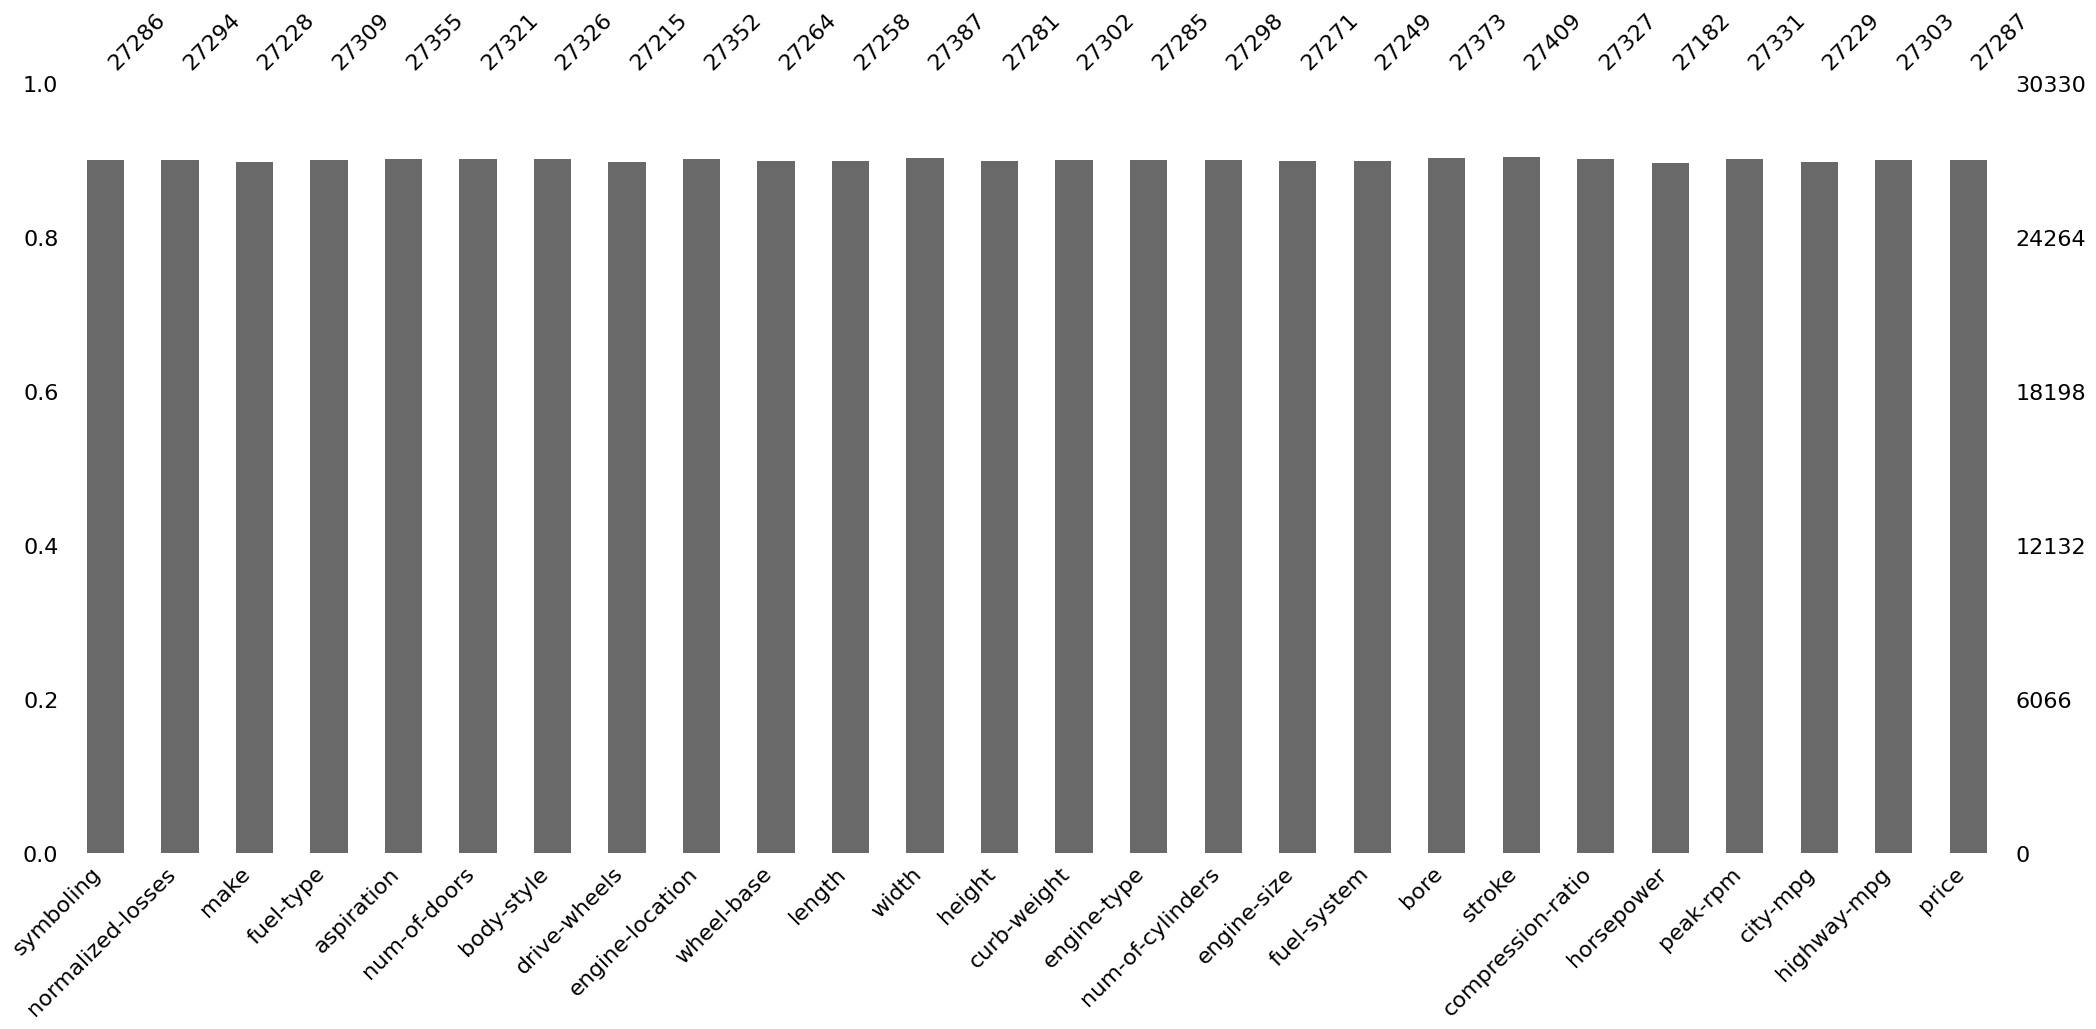

In [8]:
msno.bar(data)

In [9]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


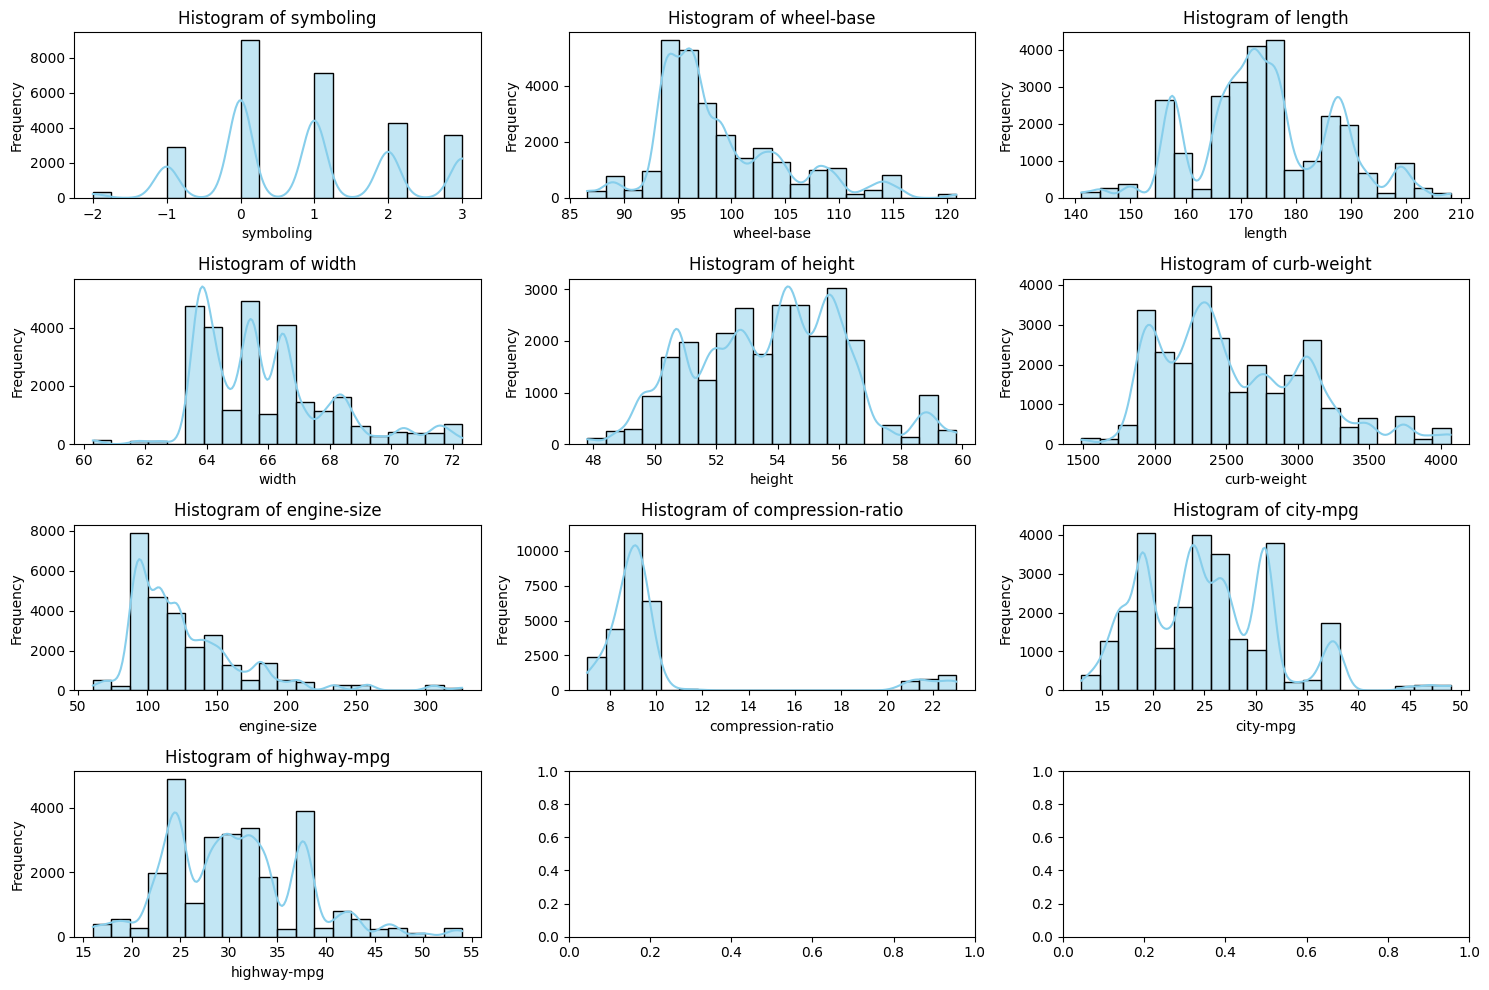

In [11]:
numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

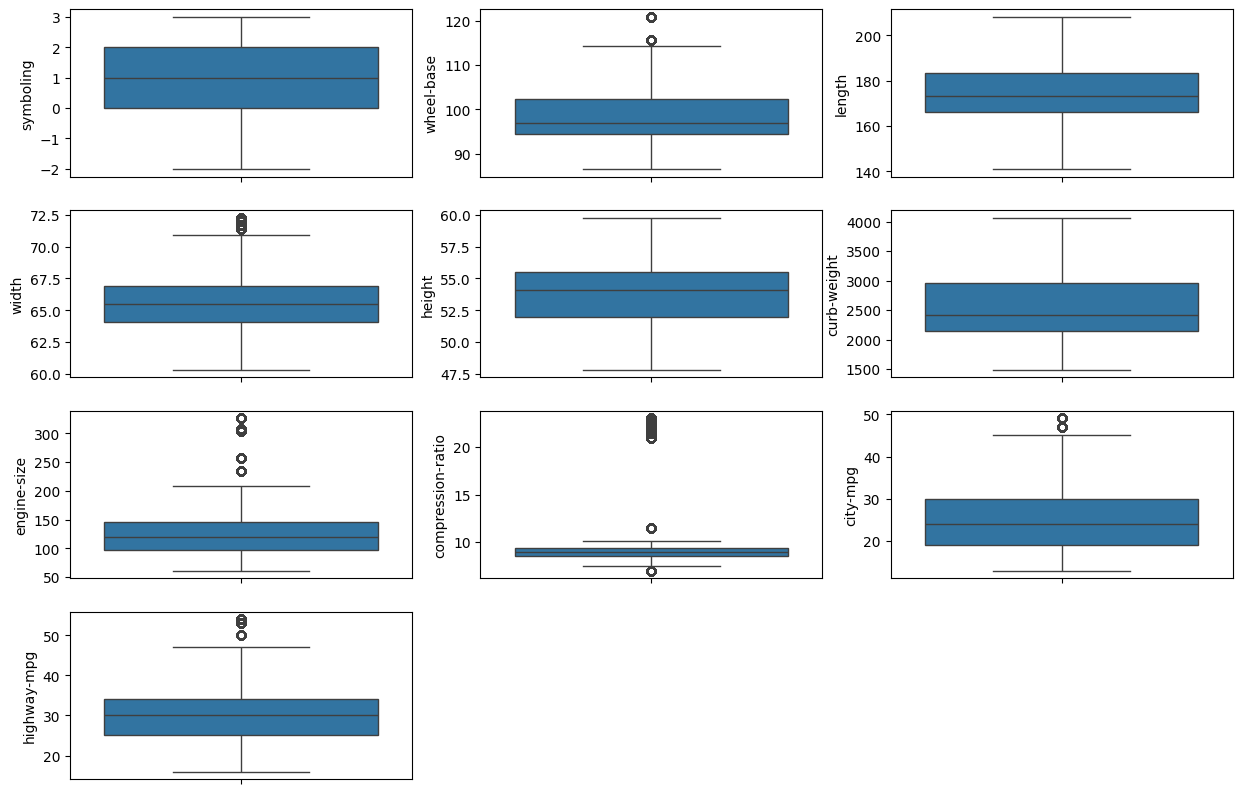

In [15]:

figure = plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data[column])
plt.show()

In [17]:
data[numeric_columns].skew()

symboling            0.222439
wheel-base           1.036002
length               0.142167
width                0.886104
height               0.066674
curb-weight          0.663485
engine-size          1.895392
compression-ratio    2.600568
city-mpg             0.670895
highway-mpg          0.552298
dtype: float64

In [21]:
def value_count_each_value(cols_list):
    for col in cols_list:
        print(data[col].value_counts())

value_count_each_value(data.columns)

symboling
 0.0    9016
 1.0    7131
 2.0    4258
 3.0    3624
-1.0    2890
-2.0     367
Name: count, dtype: int64
normalized-losses
?      5526
161    1543
91     1042
150     936
104     840
134     788
128     759
102     725
94      698
168     651
85      648
65      641
95      630
74      626
103     621
93      565
106     548
148     526
122     523
118     504
125     423
137     395
83      389
115     387
154     382
101     367
197     300
145     288
188     284
153     284
108     277
113     277
119     276
110     268
194     268
81      267
129     265
89      263
87      257
158     245
164     238
192     236
121     147
256     144
77      144
231     135
98      128
78      128
90      127
186     127
142     127
107     111
Name: count, dtype: int64
make
toyota           4229
nissan           2338
mazda            2277
mitsubishi       1796
honda            1644
subaru           1633
volkswagen       1614
peugot           1485
volvo            1370
dodge          

In [22]:
should_be_numerical = ['normalized-losses', 'bore','stroke','horsepower'
                       ,'peak-rpm','price' ]
for col in should_be_numerical:
    data[col]= pd.to_numeric(data[col], errors='coerce')

In [23]:
data.info()

# numerical cols changed from 10 - 16
# categorical cols changed from 16 - 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  21768 non-null  float64
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

### Imputing values

In [27]:
num_cols = data.select_dtypes(include='number').columns # 16 cols
cat_cols = data.select_dtypes(include='object').columns
numerical_imputer = SimpleImputer(strategy='median')
data[num_cols] = numerical_imputer.fit_transform(data[num_cols])
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = categorical_imputer.fit_transform(data[cat_cols])
print(data.isnull().sum())



symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


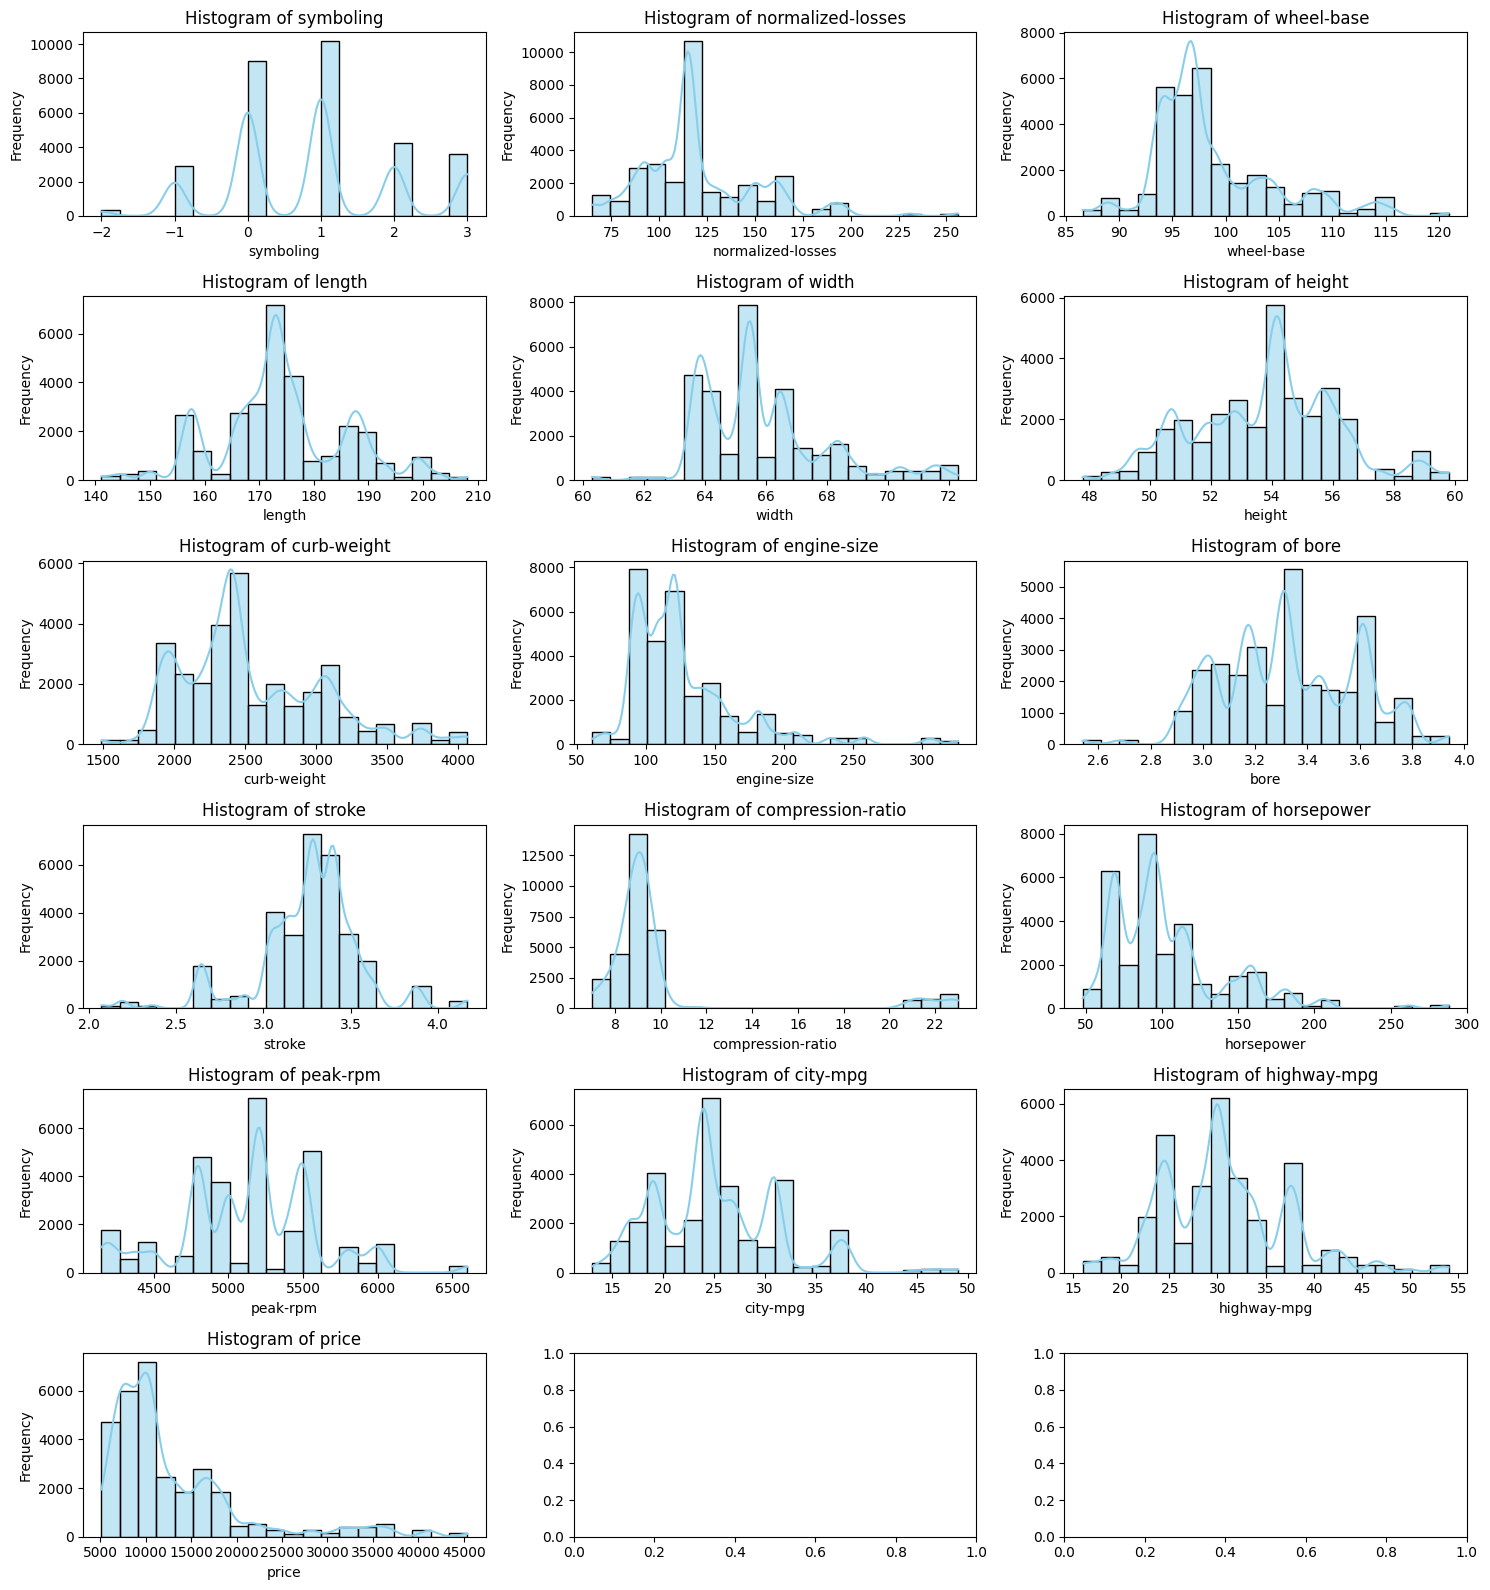

In [32]:
numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 16))

#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Identifying ordinal vs nominal

In [29]:
value_count_each_value(data.select_dtypes(include='object').columns)

make
toyota           7331
nissan           2338
mazda            2277
mitsubishi       1796
honda            1644
subaru           1633
volkswagen       1614
peugot           1485
volvo            1370
dodge            1188
bmw              1109
mercedes-benz    1089
plymouth          906
audi              903
saab              824
porsche           642
isuzu             561
chevrolet         419
jaguar            416
alfa-romero       401
renault           259
mercury           125
Name: count, dtype: int64
fuel-type
gas       27692
diesel     2638
Name: count, dtype: int64
aspiration
std      25358
turbo     4972
Name: count, dtype: int64
num-of-doors
four    18301
two     11769
?         260
Name: count, dtype: int64
body-style
sedan          15780
hatchback       9371
wagon           3361
hardtop         1016
convertible      802
Name: count, dtype: int64
drive-wheels
fwd    18892
rwd    10174
4wd     1264
Name: count, dtype: int64
engine-location
front    29968
rear       362
Nam

#### Object
- make ▶️ nominal
- fuel-type ▶️ nominal
- aspiration ▶️ nominal
- body-style ▶️ nominal
- drive-wheels ▶️ nominal
- engine-location ▶️ nominal
- engine-type ▶️ nominal
- fuel-system ▶️ nominal

- num-of-cylinders ▶️ ordinal
- num-of-doors ▶️ ordinal

In [34]:
ordinal_col = ['num-of-doors', 'num-of-cylinders']
nominal_col = ['make','fuel-type', 'aspiration','body-style',
               'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

labelEnc= LabelEncoder()

for col in ordinal_col:
    data[col]= labelEnc.fit_transform(data[col])

data = pd.get_dummies(data, columns=nominal_col)
print(data)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[30330 rows x 0 columns]


### Feature Scaling

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               30330 non-null  float64
 1   normalized-losses       30330 non-null  float64
 2   num-of-doors            30330 non-null  int64  
 3   wheel-base              30330 non-null  float64
 4   length                  30330 non-null  float64
 5   width                   30330 non-null  float64
 6   height                  30330 non-null  float64
 7   curb-weight             30330 non-null  float64
 8   num-of-cylinders        30330 non-null  int64  
 9   engine-size             30330 non-null  float64
 10  bore                    30330 non-null  float64
 11  stroke                  30330 non-null  float64
 12  compression-ratio       30330 non-null  float64
 13  horsepower              30330 non-null  float64
 14  peak-rpm                30330 non-null

#### Distribution before scaling

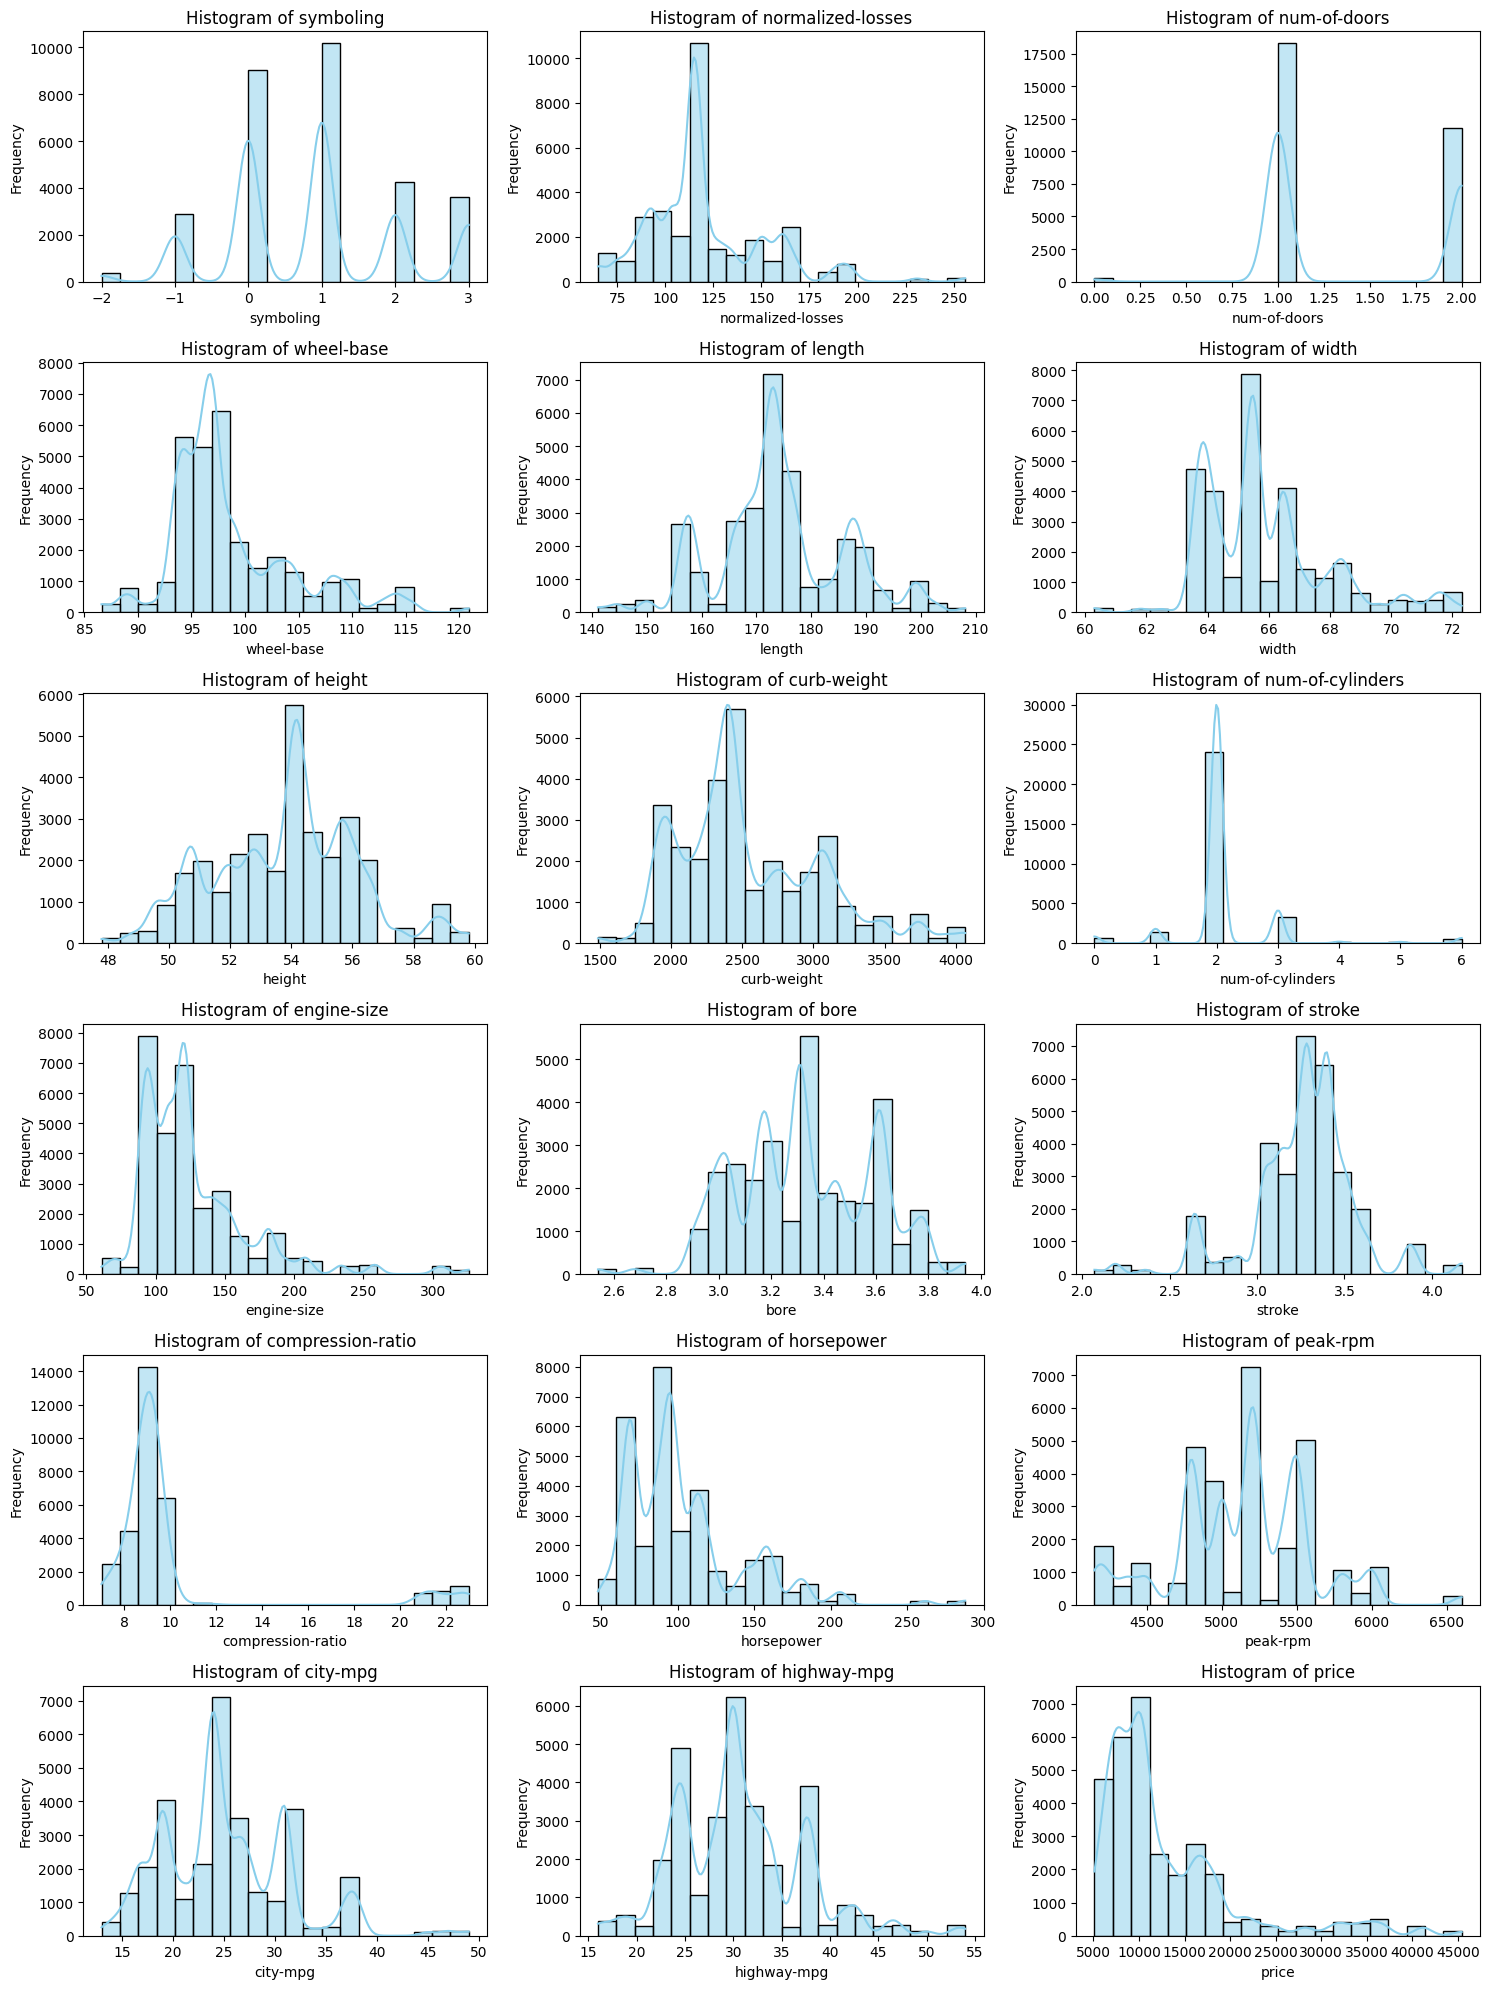

In [47]:
numeric_columns = data.select_dtypes(include=['float64','int64']).columns
num_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [48]:
num_col = data.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])


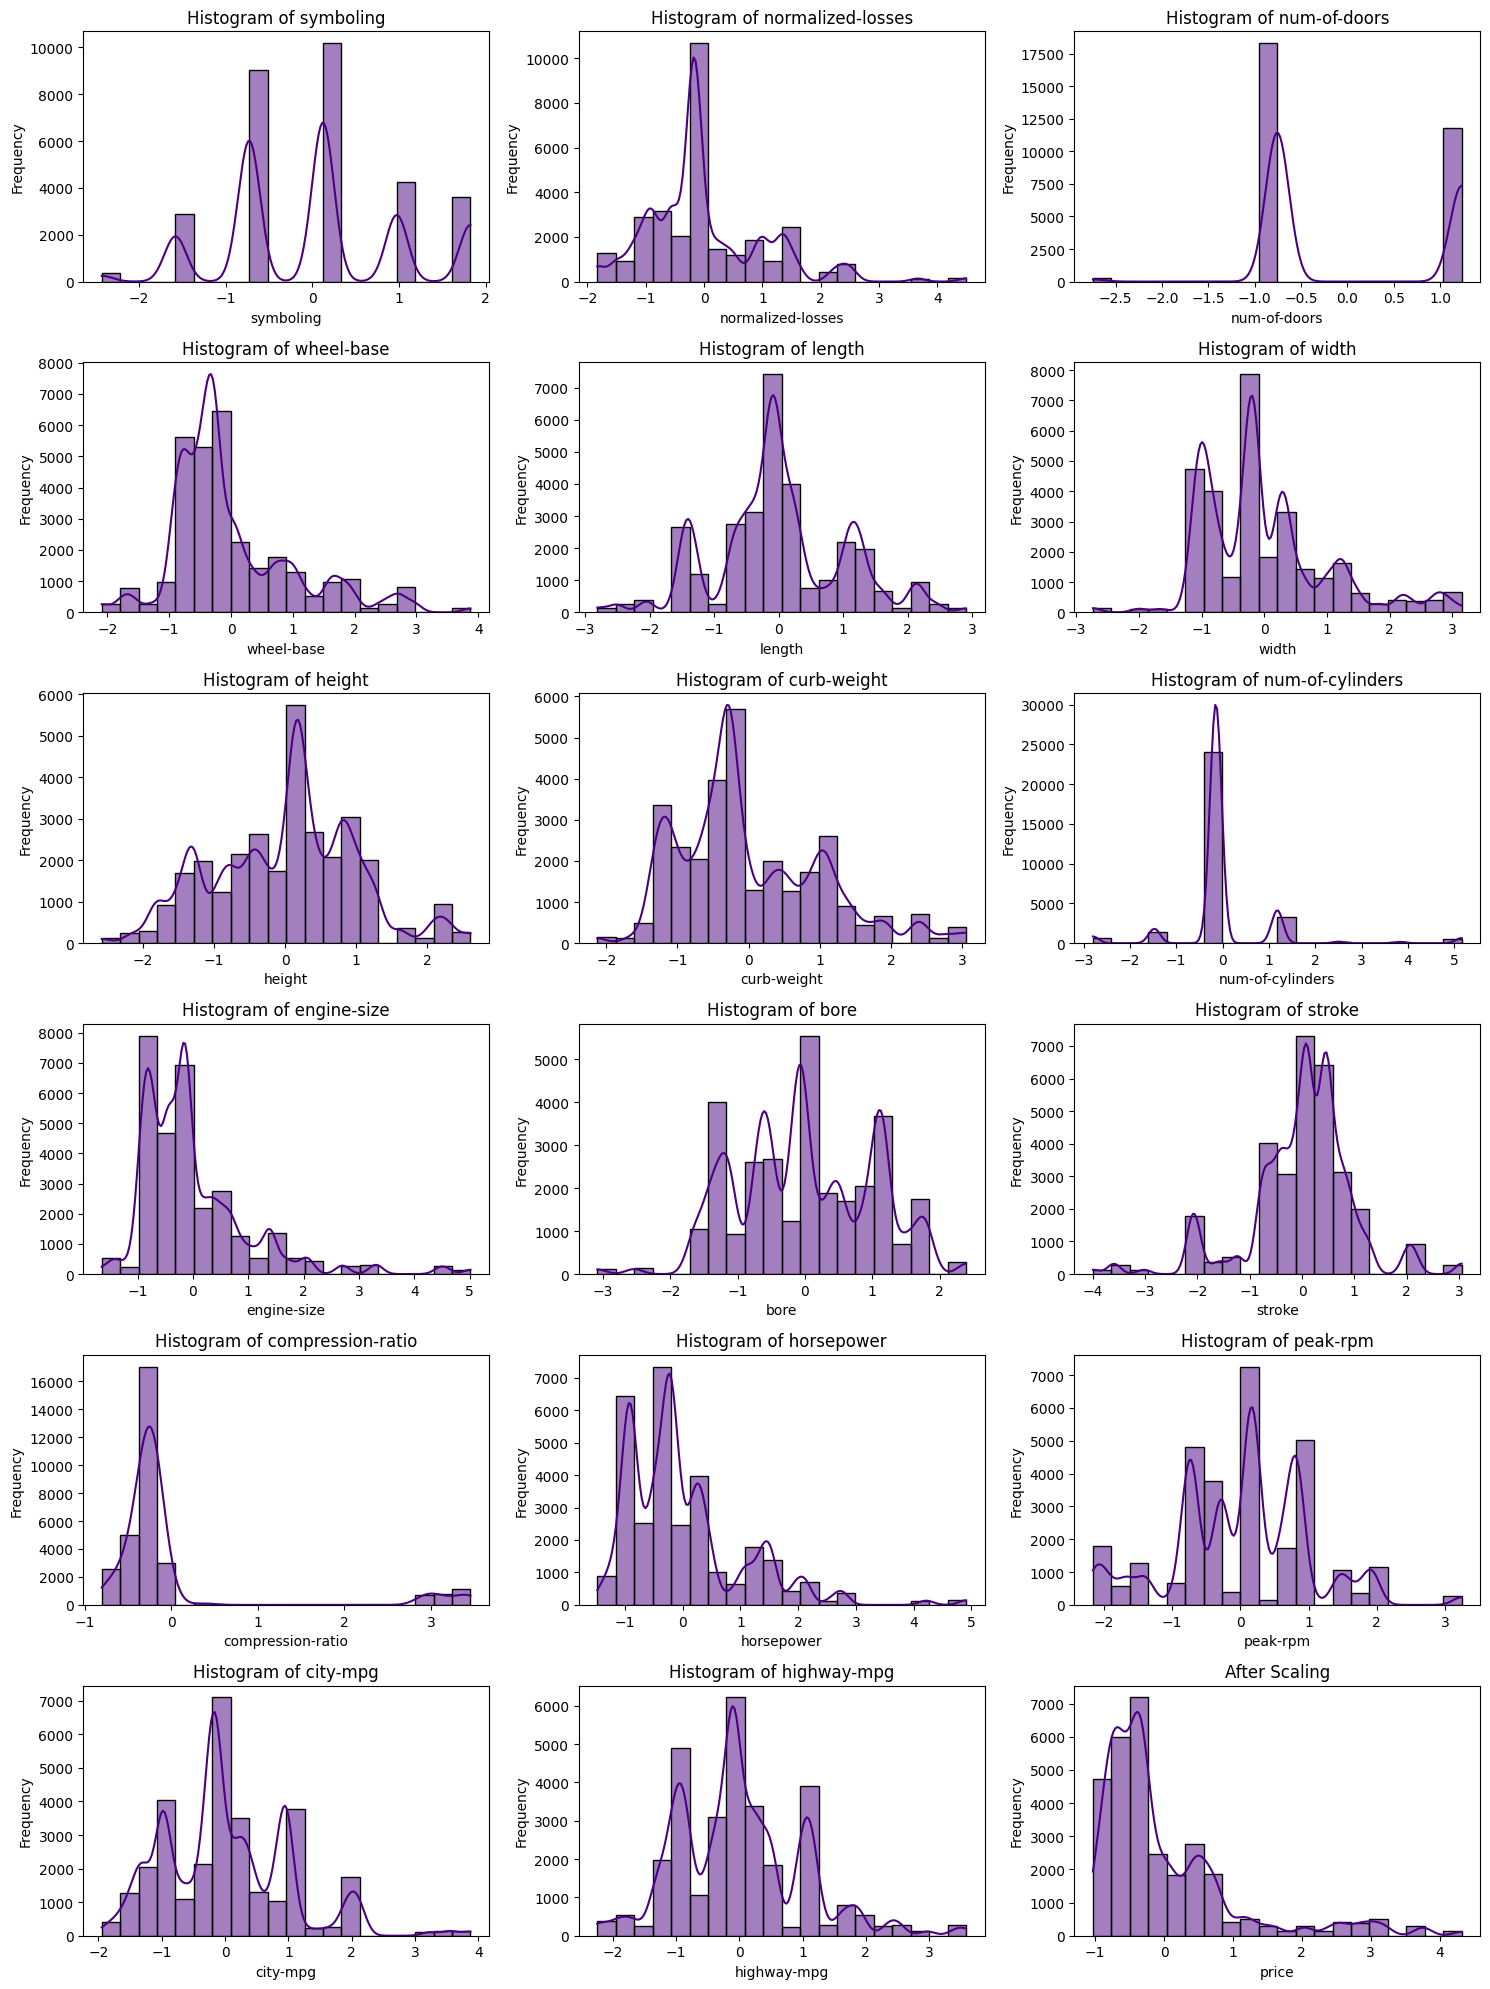

In [52]:
numeric_columns = data.select_dtypes(include=['float64','int64']).columns
num_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='indigo')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])
plt.title('After Scaling')
plt.tight_layout()
plt.show()

### Selecting features

In [55]:
corr_mat = data.corr(numeric_only=True)
price_corr = corr_mat['price'].sort_values(ascending=False)
price_corr

price               1.000000
engine-size         0.762272
curb-weight         0.729870
horsepower          0.661226
width               0.641442
                      ...   
engine-type_ohc    -0.275124
fuel-system_2bbl   -0.432490
drive-wheels_fwd   -0.502909
city-mpg           -0.595241
highway-mpg        -0.615324
Name: price, Length: 69, dtype: float64

In [62]:
selected_features =price_corr[(price_corr.abs()>0.3)].index.to_list()
print(selected_features)

['price', 'engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'drive-wheels_rwd', 'wheel-base', 'bore', 'make_mercedes-benz', 'fuel-system_mpfi', 'engine-type_ohcv', 'make_bmw', 'make_jaguar', 'fuel-system_2bbl', 'drive-wheels_fwd', 'city-mpg', 'highway-mpg']


### Preparing data for models

In [63]:
data_cleaned = data[selected_features]
X= data_cleaned.drop('price', axis=1)
y = data_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Applying Linear Reg, DecisionTree, RandomTree

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 0.26173757420149407
R-squared: 0.7325338495810804


In [65]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

Mean Squared Error: 0.1522731592507954
R-squared: 0.8443940812044675


In [66]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.128602317457179
R-squared: 0.8685830000138087


In [69]:
metrics_table = pd.DataFrame({
    'Model':['Linear Regression', 'Decision Tree Regressor','Random Forest Regressor']
    ,'MSE':[mse_lr, mse_dt, mse_rf]
    ,'R-squared':[r2_lr,r2_dt,r2_rf]

})

print(metrics_table)

                     Model       MSE  R-squared
0        Linear Regression  0.261738   0.732534
1  Decision Tree Regressor  0.152273   0.844394
2  Random Forest Regressor  0.128602   0.868583
